# Dollar Neutral Portfolio with exposure to factor of OIL.

In [46]:
#downloading Data...
#portfolio consists of 2 stocks, 1 ETF, 1 Mutual Fund, and 1 currency
import pandas_datareader as pdr
wmt = pdr.get_data_yahoo('WMT')
mcd = pdr.get_data_yahoo('MCD')
ge = pdr.get_data_yahoo('GE')

import pandas as pd
port = pd.DataFrame({'wmt':pd.DataFrame.reset_index(wmt).iloc[:,6], 'mcd':pd.DataFrame.reset_index(mcd).iloc[:,6],
                   'ge':pd.DataFrame.reset_index(ge).iloc[:,6]})
port_ret = port.pct_change().dropna()

In [47]:
#factor_1 is oil prices
factor_1 = pdr.get_data_yahoo('CL=F')
factor_1 = pd.DataFrame({'factor_1':pd.DataFrame.reset_index(factor_1).iloc[:,6]})

In [48]:
import numpy as np
factor_exp = [0]*port_ret.shape[1]
for i in range(0,port_ret.shape[1]):
    factor_exp[i] = np.cov(np.transpose(factor_1), port_ret.iloc[:len(factor_1),i])[0][1]

In [61]:
from pyPortfolioAnalysis import *
#adding constraints and objectives in a portfolio
p1 = portfolio_spec(assets = list(port_ret.columns))
add_constraint(p1, kind = 'box', minimum = [-0.3, -0.1, -0.3], maximum = [0.4, 0.75, 0.6])
add_constraint(p1, 'full_investment')
add_constraint(p1, kind = 'group', groups = {'auto':[2], 'other':[0,1]},
              group_min = [-.2, -0.3], group_max = [.4, 0.99])
add_constraint(p1, kind = 'factor_exposure', B = factor_exp, lower = 0.0, upper = 0.0005)
add_objective(p1, kind='return', name = 'mean', target = 0.0005)
add_objective(p1, kind='risk', name = 'std', target = .01)
p1.port_summary()
constraints = get_constraints(p1)
#summary method is useful to get the complete picture of the portfolio
p1.port_summary()


{'Assets': ['wmt', 'mcd', 'ge'],
 'Number of Assets': 3,
 'category_labels': None,
 'Constraints': {'box': {'minimum': [-0.3, -0.1, -0.3],
   'maximum': [0.4, 0.75, 0.6],
   'enabled': True},
  'full_investment': {'min_sum': 1, 'max_sum': 1, 'enabled': True},
  'group': {'groups': {'auto': [2], 'other': [0, 1]},
   'group_min': [-0.2, -0.3],
   'group_max': [0.4, 0.99],
   'group_label': ['auto', 'other'],
   'enabled': True},
  'factor_exposure': {'B': matrix([[-0.00592496],
           [-0.00326583],
           [ 0.00099429]]),
   'lower': 0.0,
   'upper': 0.0005,
   'enabled': True}},
 'Objectives': {'return': {'target': 0.0005,
   'multiplier': -1,
   'arguments': {},
   'enabled': True,
   'name': 'mean'},
  'risk': {'target': 0.01,
   'multiplier': -1,
   'arguments': {},
   'enabled': True,
   'name': 'std'}}}

In [56]:
optimize_portfolio(port_ret, p1, optimize_method = 'DEoptim', disp = False)

[{'weights': {'wmt': 0.37252697575556637,
   'mcd': 0.4267762405559593,
   'ge': 0.2006962401876775}},
 {'objective_measures': [['return', array(0.00055759)],
   ['risk', array(0.01191289)]]},
 {'best': 73.71214752648412}]

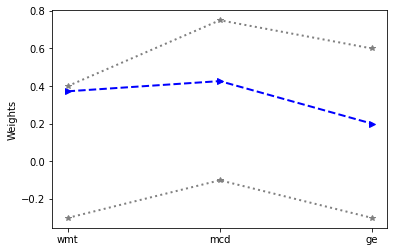

In [57]:
chart_weights(p1)